In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

In [3]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
data = pd.read_csv("all_stocks_5yr.csv", delimiter=",", on_bad_lines='skip')
print(data.sample(5))
print(data.shape)

              date    open    high     low   close   volume Name
196554  2016-08-26   54.27   54.60   53.51   53.73  2614538  EMR
306864  2014-10-02   55.41   55.79   54.51   55.64  2741831   IR
365328  2014-05-05  101.38  101.38  100.59  101.14  3483458  MCD
509522  2013-04-08   81.63   82.53   81.41   82.48   137732  SNA
289512  2014-03-21  119.68  119.81  116.97  116.99  2038273  HUM
(619040, 7)


In [10]:
(data.info)

<bound method DataFrame.info of               date   open   high    low  close    volume Name
0       2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1       2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2       2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3       2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4       2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
...            ...    ...    ...    ...    ...       ...  ...
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS

[619040 rows x 7 columns]>

In [12]:
data['date'] = pd.to_datetime(data['date'])

In [13]:
print(data['date'].info)

<bound method Series.info of 0        2013-02-08
1        2013-02-11
2        2013-02-12
3        2013-02-13
4        2013-02-14
            ...    
619035   2018-02-01
619036   2018-02-02
619037   2018-02-05
619038   2018-02-06
619039   2018-02-07
Name: date, Length: 619040, dtype: datetime64[ns]>


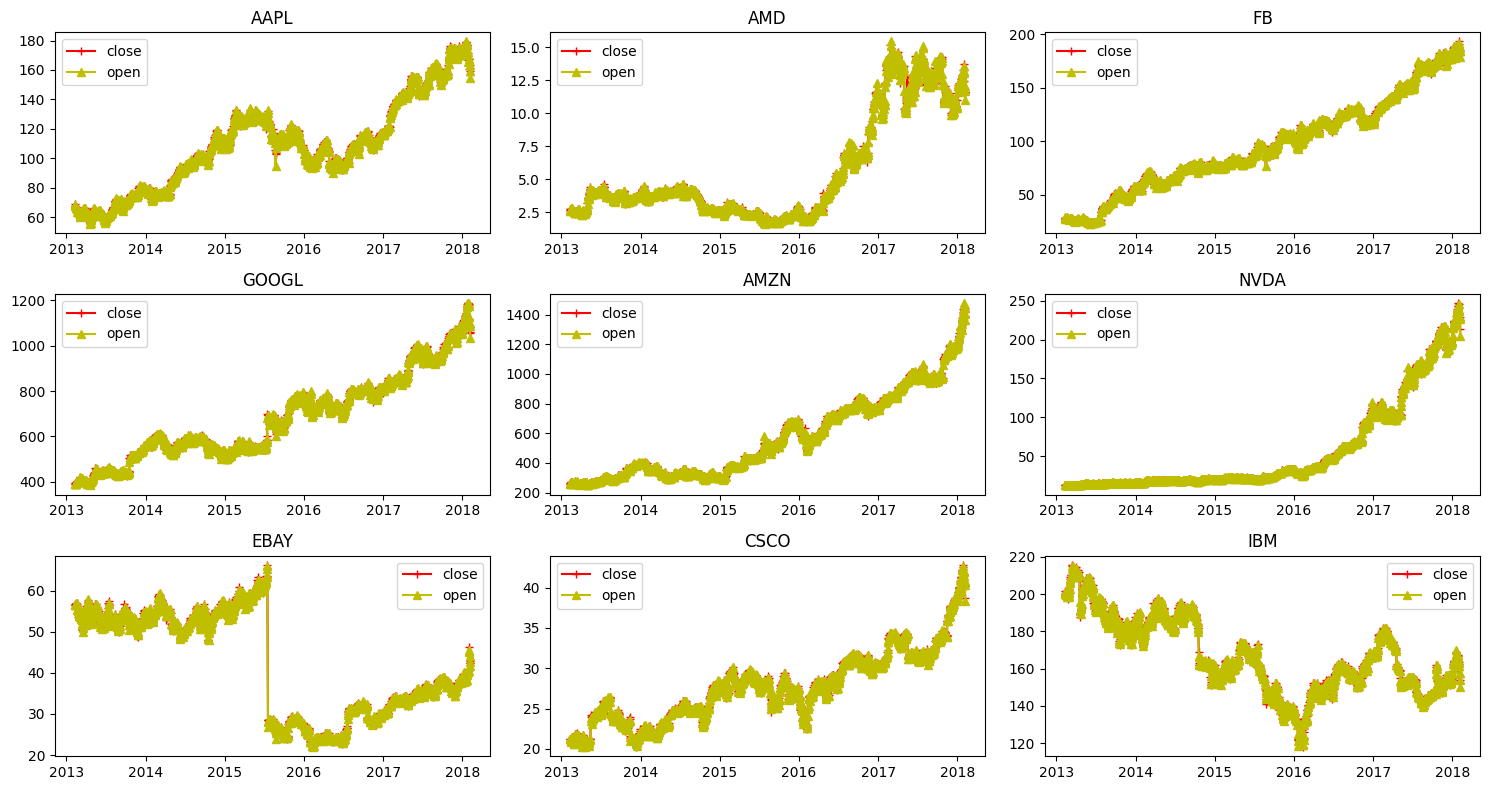

In [19]:
companies = ['AAPL', 'AMD', 'FB', 'GOOGL', 'AMZN', 'NVDA', 'EBAY', 'CSCO', 'IBM']
plt.figure(figsize=(15, 8)) 
for index, company in enumerate(companies, 1): 
    plt.subplot(3, 3, index) 
    c = data[data['Name'] == company] 
    plt.plot(c['date'], c['close'], c="r", label="close", marker="+") 
    plt.plot(c['date'], c['open'], c="y", label="open", marker="^") 
    plt.title(company) 
    plt.legend() 
    plt.tight_layout()

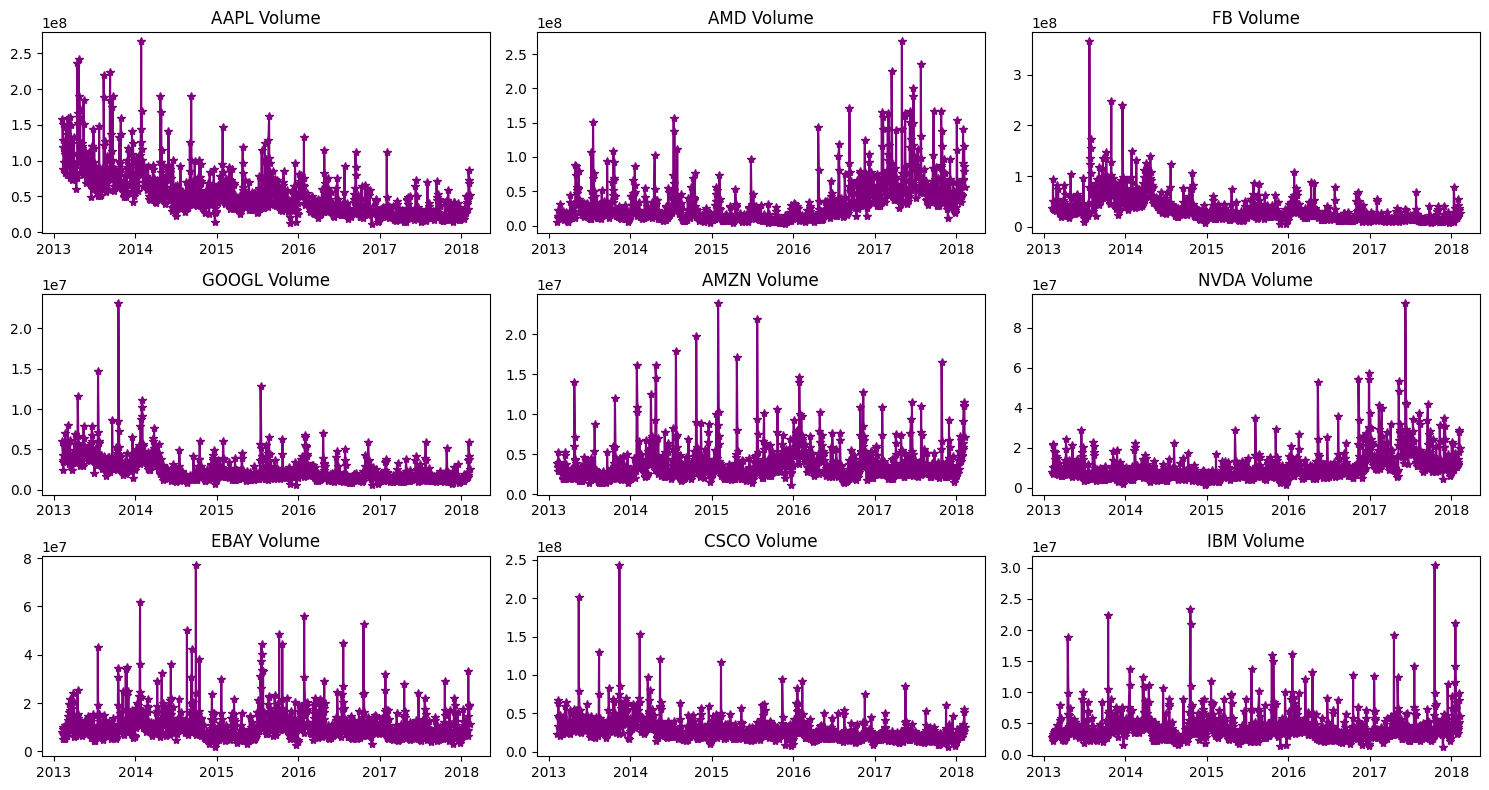

In [20]:
plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = data[data['Name'] == company]
    plt.plot(c['date'], c['volume'], c='purple', marker='*')
    plt.title(f"{company} Volume")
    plt.tight_layout()


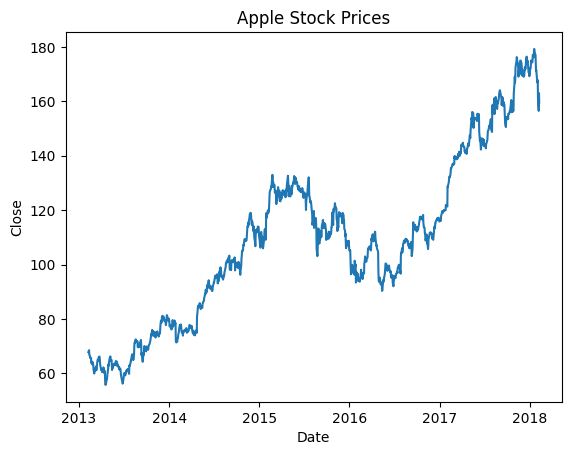

In [22]:
apple = data[data['Name'] == 'AAPL']
plt.plot(apple['date'],apple['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()


In [39]:
dataset = apple['close'].values.reshape(1259,1)
# print(dataset)
training = int(len(dataset)*0.95)+1


In [38]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.1-cp312-cp312-win_amd64.whl (43.6 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
# scaled_data
train_data = scaled_data[0:training, :]
(train_data)

array([[0.0977103 ],
       [0.103438  ],
       [0.08951884],
       ...,
       [0.9452499 ],
       [0.95942337],
       [0.96395889]])

In [57]:
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
#x_train.shape
#y_train.shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.0977103 ],
        [0.103438  ],
        [0.08951884],
        ...,
        [0.06362512],
        [0.06878507],
        [0.08119942]],

       [[0.103438  ],
        [0.08951884],
        [0.08848863],
        ...,
        [0.06878507],
        [0.08119942],
        [0.07882556]],

       [[0.08951884],
        [0.08848863],
        [0.08800268],
        ...,
        [0.08119942],
        [0.07882556],
        [0.08482135]],

       ...,

       [[0.8061069 ],
        [0.82360102],
        [0.84279595],
        ...,
        [0.91722692],
        [0.8998138 ],
        [0.90969474]],

       [[0.82360102],
        [0.84279595],
        [0.85696942],
        ...,
        [0.8998138 ],
        [0.90969474],
        [0.9452499 ]],

       [[0.84279595],
        [0.85696942],
        [0.85170499],
        ...,
        [0.90969474],
        [0.9452499 ],
        [0.95942337]]])

In [94]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
print(model.summary())


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

None


In [95]:
model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=15)

Epoch 1/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0603
Epoch 2/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0017
Epoch 3/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 8.7634e-04
Epoch 4/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 9.2539e-04
Epoch 5/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 8.7639e-04
Epoch 6/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 7.4936e-04
Epoch 7/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 7.8289e-04
Epoch 8/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 6.6100e-04
Epoch 9/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 6.7623e-04
Epoch 10/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 7.0102e-04
Epoch 11/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 6.6551e-04
Epoch 12/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 6.5090e-04
Epoch 13/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 6.3780e-04
Epoch 14/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 7.8409e-04
Epoch 15/15
36/36 ━━━━━

In [96]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
MSE 15.512516127568746
RMSE 3.9385931660389533


In [97]:
print(history)


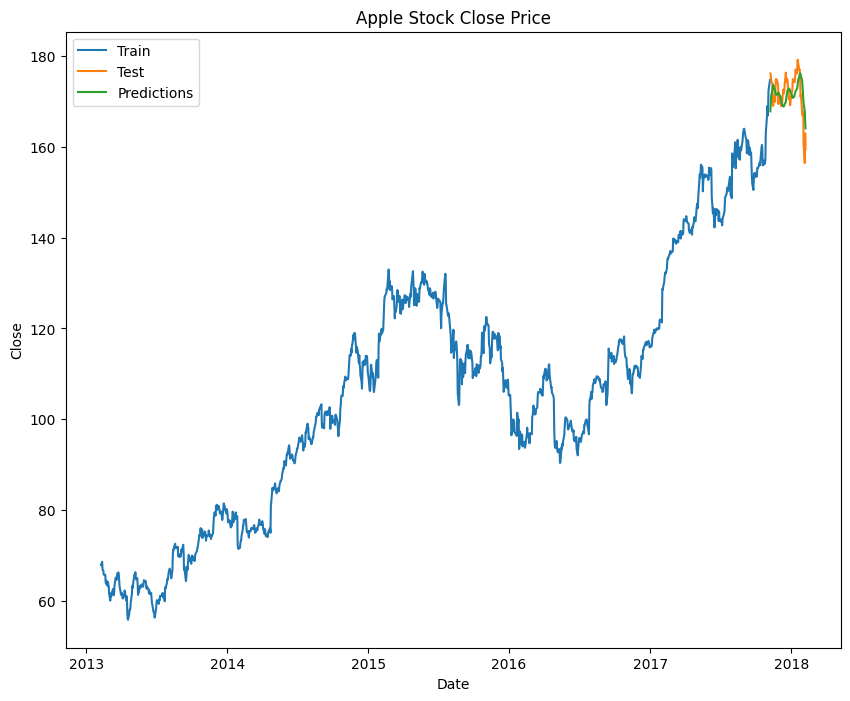

In [98]:
train = apple[:training]
test = apple[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['close'])
plt.plot(test['date'], test['close'])
plt.plot(test['date'], test['Predictions'])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])


